This notebook was tested from a GFDL workstation.
This notebook is an example of using catalog builder from a notebook to generate data catalogs, a.k.a intake-esm catalogs.

How to get here? 

Login to your workstation at GFDL.
module load miniforge
conda activate catalogbuilder 
(For the above: Note that you can either install your own environment using the following or use an existing environment such as this: conda activate /nbhome/Aparna.Radhakrishnan/conda/envs/catalogbuilder)

Alternatively (or the primary method)

conda create -n catalogbuilder 
conda install catalogbuilder -c noaa-gfdl -n catalogbuilder

Now, we do a couple of things to make sure your environment is available to jupyter-lab as a kernel.

pip install ipykernel 
python -m ipykernel install --user --name=catalogbuilder

Now, start a jupyter-lab session from GFDL workstation: 

jupyter-lab 

This will give you the URL to the jupyter-lab session running on your localhost. Paste the URL in your web-browser (or via TigerVNC). Paste the notebook cells from this notebook, or locate the notebook from the path where you have downloaded or cloned it via git. Go to Kernel->Change Kernel-> Choose intakebuilder.

Run the notebook and see the results! Extend it and share it with us via a github issue. 


In [1]:
import sys, os 
git_package_dir = '/home/a1r/git/forkCatalogBuilder-/'
sys.path.append(git_package_dir)

import catalogbuilder
from catalogbuilder.scripts import gen_intake_gfdl
######USER input begins########

#User provides the input directory for which a data catalog needs to be generated.

input_path = "/home/a1r/cgd/amp/bundy/b.e23_alpha16g.BLT1850.ne30_t232.082b/20240314bl/"

#USER inputs the output path. Based on the following setting, user can expect to see /home/a1r/mycatalog.csv and /home/a1r/mycatalog.json generated as output.

output_path = "/home/a1r/tests/cesm-example1"
#NOTE: If your input_path does not look like the above in general, you will need to pass a --config which is custom 
#for your directory structure. See examples below.  
####END OF user input ##########

#This config has information fed to the catalog builder about the directory structure and filename patterns
configyaml = os.path.join(git_package_dir, 'catalogbuilder/scripts/configs/cesm-template.yaml')
#configyaml = '/home/a1r/git/forkCatalogBuilder-/catalogbuilder/scripts/configs/cesm-template.yaml'


### You can specify a log file for the debug and info messages if you'd like.
### This is optional. 

import logging
hdlr = logging.FileHandler('/nbhome/a1r/logs/local.log') 
gen_intake_gfdl.logger.addHandler(hdlr)

#issue https://github.com/NOAA-GFDL/CatalogBuilder/issues/69

In [2]:
#This is an example call to run catalog builder using a yaml config file.

def create_catalog_from_config(input_path=input_path,output_path=output_path,configyaml=configyaml):
    csv, json = gen_intake_gfdl.create_catalog(input_path=input_path,output_path=output_path,verbose=True,config=configyaml,slow=True)
    return(csv,json)

if __name__ == '__main__':
    create_catalog_from_config(input_path,output_path,configyaml)
    

INFO:local:Verbose log activated.
DEBUG:local:input_path does not exist in config
DEBUG:local:output_path does not exist in config
DEBUG:local:headerlist :['activity_id', 'institution_id', 'source_id', 'experiment_id', 'frequency', 'realm', 'table_id', 'member_id', 'grid_label', 'variable_id', 'time_range', 'chunk_freq', 'grid_label', 'platform', 'dimensions', 'cell_methods', 'standard_name', 'path']
DEBUG:local:output_path_template :['NA', 'NA', 'NA', 'NA', 'NA', 'experiment_id', 'custom_pp', 'cell_methods']
DEBUG:local:output_file_template :['NA', 'NA', 'NA', 'NA', 'NA', 'source_id', 'frequency', 'variable_id', 'time_range']
INFO:local:Default schema: catalogbuilder/cats/gfdl_template.json
INFO:local:input path: /home/a1r/cgd/amp/bundy/b.e23_alpha16g.BLT1850.ne30_t232.082b/20240314bl/
INFO:local: output path: /home/a1r/tests/cesm-example1
DEBUG:local:Calling gfdlcrawler.crawlLocal
DEBUG:local:Missing cols from metadata sources:['activity_id', 'institution_id', 'realm', 'table_id', 'm

Found existing file! Overwrite? (y/n) y


JSON generated at: /home/a1r/tests/cesm-example1.json
CSV generated at: /home/a1r/tests/cesm-example1.csv
INFO:local:CSV generated at/home/a1r/tests/cesm-example1.csv


In [7]:
%tb

SystemExit: Input path does not exist. Adjust configuration.

Let's begin our analysis

In [4]:
import intake, intake_esm
import matplotlib #do a pip install of tools needed in your env or from the notebook
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [5]:
import intake, intake_esm

In [6]:
col_url = "/home/a1r/tests/mycatalog-jpk.json"
col = intake.open_esm_datastore(col_url)

Explore the catalog

In [7]:
col.df

,activity_id,institution_id,source_id,experiment_id,frequency,realm,table_id,member_id,grid_label,variable_id,time_range,chunk_freq,platform,dimensions,cell_methods,standard_name,path
0,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,zos_min,00110101-00151231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
1,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,mlotst,00010101-00051231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,ocean_mixed_layer_thickness_defined_by_sigma_t,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
2,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,omldamax,00010101-00051231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,ocean_mixed_layer_thickness_defined_by_mixing_...,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
3,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,zos,00110101-00151231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,sea_surface_height_above_geoid,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
4,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,day,ocean_daily,NaN,NaN,NaN,sos,00010101-00051231,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,sea_surface_salinity,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_o_ice,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
10001,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_Qavg,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
10002,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_T,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...
10003,dev,NaN,fre,CM4.5v01_om5b06_piC_noBLING,mon,river,NaN,NaN,NaN,rv_veloc,005601-006012,5yr,gfdl.ncrc5-intel23-prod-openmp,NaN,ts,NaN,/archive/John.Krasting/fre/FMS2024.02_OM5_2024...


Let's narrow down the search

In [9]:
expname_filter = ['CM4.5v01_om5b06_piC_noBLING']
modeling_realm = "ocean_monthly"
frequency = "mon"

In [10]:
cat = col.search(experiment_id=expname_filter,frequency=frequency,realm=modeling_realm)

In [11]:
set(cat.df["variable_id"])

{'Heat_PmE',
 'LwLatSens',
 'MLD_003',
 'MLD_003_max',
 'MLD_003_min',
 'MLD_EN1',
 'MLD_EN1_max',
 'MLD_EN1_min',
 'MLD_EN2',
 'MLD_EN3',
 'SSH',
 'S_adx_2d',
 'S_ady_2d',
 'T_adx_2d',
 'T_ady_2d',
 'col_height',
 'col_mass',
 'ePBL_h_ML',
 'evs',
 'ficeberg',
 'friver',
 'fsitherm',
 'heat_content_cond',
 'heat_content_fprec',
 'heat_content_massin',
 'heat_content_massout',
 'heat_content_surfwater',
 'heat_content_vprec',
 'hf_CAu_2d',
 'hf_CAv_2d',
 'hf_PFu_2d',
 'hf_PFv_2d',
 'hf_diffu_2d',
 'hf_diffv_2d',
 'hf_du_dt_visc_2d',
 'hf_dudt_2d',
 'hf_dv_dt_visc_2d',
 'hf_dvdt_2d',
 'hf_gKEu_2d',
 'hf_gKEv_2d',
 'hf_rvxu_2d',
 'hf_rvxv_2d',
 'hf_u_BT_accel_2d',
 'hf_v_BT_accel_2d',
 'hfds',
 'hfevapds',
 'hfibthermds',
 'hflso',
 'hfrainds',
 'hfrunoffds',
 'hfsifrazil',
 'hfsnthermds',
 'hfsso',
 'intz_CAu_2d',
 'intz_CAv_2d',
 'intz_PFu_2d',
 'intz_PFv_2d',
 'intz_diffu_2d',
 'intz_diffv_2d',
 'intz_gKEu_2d',
 'intz_gKEv_2d',
 'intz_rvxu_2d',
 'intz_rvxv_2d',
 'intz_u_BT_accel_2d',


In [12]:
cat = cat.search(variable_id="sos") #Total Soil Moisture Content

dmget the files

In [13]:
cat

,unique
activity_id,1
institution_id,0
source_id,1
experiment_id,1
frequency,1
realm,1
table_id,0
member_id,0
grid_label,0
variable_id,1


In [14]:
#for simple dmget usage, just use this !dmget {file}
#use following to wrap the dmget call for each path in the catalog
def dmgetmagic(x):
    cmd = 'dmget %s'% str(x) 
    return os.system(cmd)

#OR refer to importing dmget ,  https://github.com/aradhakrishnanGFDL/canopy-cats/tree/main/notebooks/dmget.py

In [15]:
dmstatus = cat.df["path"].apply(dmgetmagic)

In [16]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'source_id.experiment_id.frequency.realm.chunk_freq'


In [17]:
for k in dset_dict.keys(): 
    print(k)

fre.CM4.5v01_om5b06_piC_noBLING.mon.ocean_monthly.5yr


In [18]:
ds = dset_dict[k]

In [19]:
ds

<xarray.Dataset> Size: 4GB
Dimensions:     (time: 660, yh: 1161, xh: 1440, nv: 2)
Coordinates:
    average_DT  (time) timedelta64[ns] 5kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) object 5kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) object 5kB dask.array<chunksize=(5,), meta=np.ndarray>
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) object 5kB 0001-01-16 12:00:00 ... 0060-12-16 12:00:00
    time_bnds   (time, nv) object 11kB dask.array<chunksize=(5, 2), meta=np.ndarray>
  * xh          (xh) float64 12kB -299.9 -299.6 -299.4 ... 59.38 59.62 59.88
  * yh          (yh) float64 9kB -88.52 -88.42 -88.32 ... 89.73 89.84 89.95
Data variables:
    sos         (time, yh, xh) float32 4GB dask.array<chunksize=(5, 1161, 1440), meta=np.ndarray>
Attributes: (12/17)
    title:                           CM4.5v01_om5b06_piC_noBLING
    grid_type:                       regular
    grid_tile:                       N/A
    external_variables:              areacello
    intake_esm_vars:                 ['sos']
    intake_esm_attrs:activity_id:    dev
    ...                              ...
    intake_esm_attrs:chunk_freq:     5yr
    intake_esm_attrs:platform:       gfdl.ncrc5-intel23-prod-openmp
    intake_esm_attrs:cell_methods:   ts
    intake_esm_attrs:standard_name:  sea_surface_salinity
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          fre.CM4.5v01_om5b06_piC_noBLING.mon.ocea...

In [20]:
ds["sos"]

<xarray.DataArray 'sos' (time: 660, yh: 1161, xh: 1440)> Size: 4GB
dask.array<concatenate, shape=(660, 1161, 1440), dtype=float32, chunksize=(5, 1161, 1440), chunktype=numpy.ndarray>
Coordinates:
    average_DT  (time) timedelta64[ns] 5kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) object 5kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) object 5kB dask.array<chunksize=(5,), meta=np.ndarray>
  * time        (time) object 5kB 0001-01-16 12:00:00 ... 0060-12-16 12:00:00
  * xh          (xh) float64 12kB -299.9 -299.6 -299.4 ... 59.38 59.62 59.88
  * yh          (yh) float64 9kB -88.52 -88.42 -88.32 ... 89.73 89.84 89.95
Attributes:
    units:          psu
    long_name:      Sea Surface Salinity
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_salinity

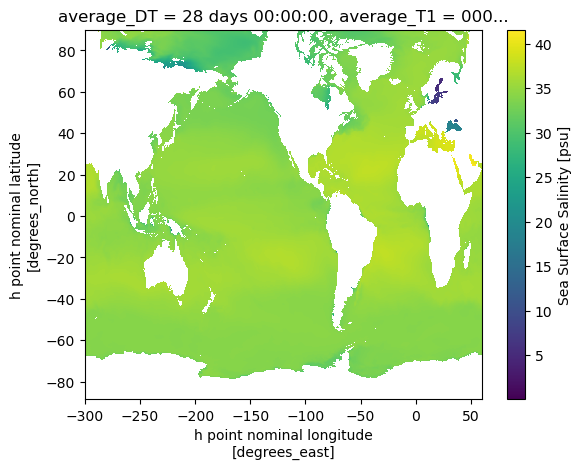

In [21]:
sos = ds.sos.isel(time=1).plot()

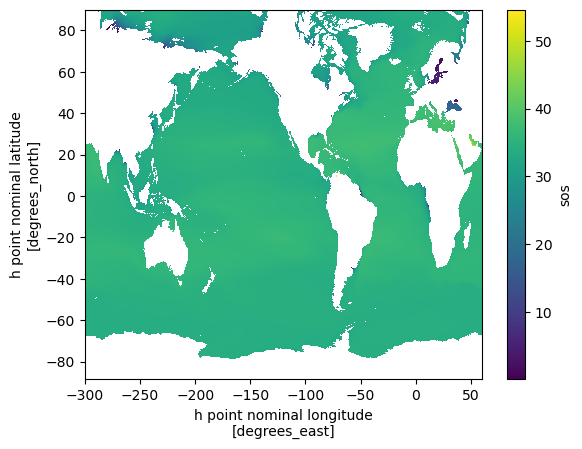

In [22]:
ds.sos.mean(dim='time').plot()